In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
delivery_df=pd.read_csv("/content/drive/MyDrive/Asignments_DS/delivery_time.csv")
delivery_df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
#EDA

In [ ]:
delivery_df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [ ]:
#There are no null values


In [ ]:
delivery_df.shape

(21, 2)

In [ ]:
delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
delivery_df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


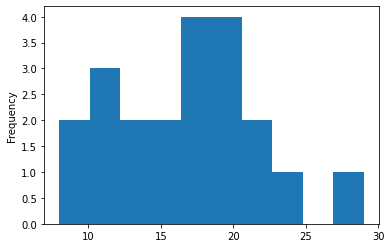

In [ ]:
delivery_df["Delivery Time"].plot(kind='hist')

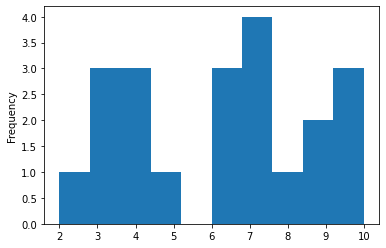

In [ ]:
delivery_df["Sorting Time"].plot(kind='hist')

In [ ]:
delivery_df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [ ]:
print("There is {0} corelation between x & y".format(100*(np.corrcoef(delivery_df['Delivery Time'],delivery_df['Sorting Time'])[0,1])))

There is 82.59972607955326 corelation between x & y


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas.util.testing as tm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


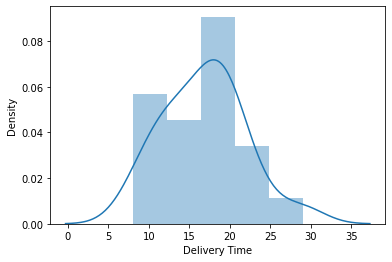

In [ ]:
sns.distplot(delivery_df['Delivery Time'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


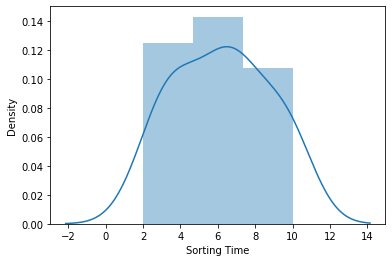

In [ ]:
sns.distplot(delivery_df['Sorting Time'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


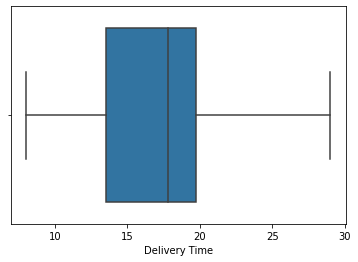

In [ ]:
sns.boxplot(delivery_df['Delivery Time'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


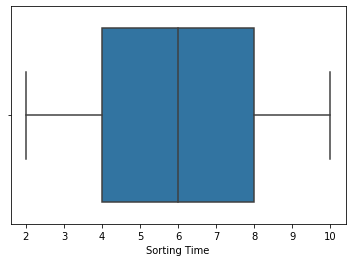

In [ ]:
sns.boxplot(delivery_df['Sorting Time'])

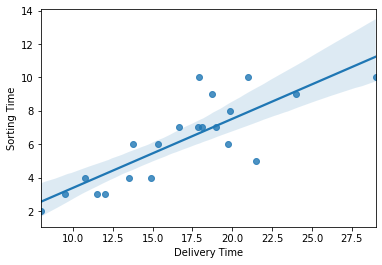

In [ ]:
sns.regplot(x='Delivery Time', y='Sorting Time', data=delivery_df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


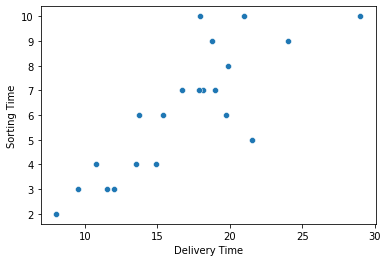

In [ ]:
sns.scatterplot(delivery_df['Delivery Time'],delivery_df['Sorting Time'])

In [ ]:
#Data points are not strong positive & linear

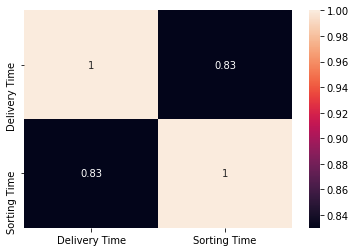

In [ ]:
cor_m=delivery_df.corr().round(2)
sns.heatmap(data=cor_m,annot=True)

In [ ]:
#there is low corelation in heat Map

In [ ]:
#preparing the data ,Testing & training the model

In [ ]:
X=delivery_df['Delivery Time'].values.reshape(-1,1)
Y=delivery_df['Sorting Time'].values.reshape(-1,1)


In [ ]:
print(X.shape,Y.shape)

(21, 1) (21, 1)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.4,random_state=101)

In [ ]:
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

(12, 1) (12, 1) (9, 1) (9, 1)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr.coef_

array([[0.405562]])

In [ ]:
y_pred=lr.predict(xtest)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


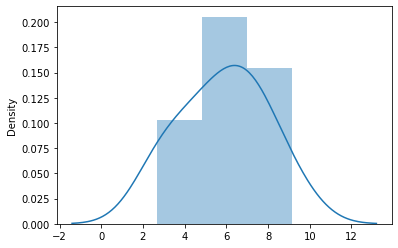

In [ ]:
sns.distplot(y_pred)

In [ ]:
from sklearn import metrics
print("Mean Squared Error :",metrics.mean_squared_error(ytest,y_pred))
print("Root Mean Squared Error :",np.sqrt(metrics.mean_squared_error(ytest,y_pred)))
print("Mean Absolute Error :",metrics.mean_absolute_error(ytest,y_pred))
print("persentage of data points close to regression line (coff of determination) :",100*(metrics.r2_score(ytest,y_pred)))

Mean Squared Error : 0.6061000956712628
Root Mean Squared Error : 0.7785243064100585
Mean Absolute Error : 0.6790534599813561
persentage of data points close to regression line (coff of determination) : 87.4759929210785


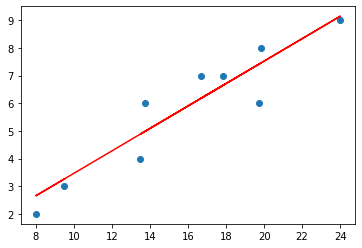

In [ ]:
plt.scatter(xtest,ytest)
plt.plot(xtest,y_pred,c="r")

In [ ]:
#We can see all points are close to regression line